In [2]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set display options
pd.set_option('display.max_columns', None)

In [36]:
# import dataset
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
real_estate = pd.read_csv('./data/Ames_Real_Estate_Data.csv')

/Users/brandonryu/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# real_estate.Neighborhood.value_counts()
# real_estate

## Pre-Processing Data

### 1. Missing Data

In [5]:
# Alley : data description says NA means "no alley access"
housing.Alley.fillna("None", inplace=True)
# BedroomAbvGr : NA most likely means 0
housing.BedroomAbvGr.fillna(0,inplace=True)
# BsmtQual etc : data description says NA for basement features is "no basement"
housing.BsmtQual.fillna(0, inplace=True)
housing.BsmtCond.fillna(0, inplace=True)
housing.BsmtExposure.fillna('No', inplace=True)
housing.BsmtFinType1.fillna(0, inplace=True)
housing.BsmtFinType2.fillna(0, inplace=True)
housing.BsmtFullBath.fillna(0, inplace=True)
housing.BsmtHalfBath.fillna(0, inplace=True)
housing.BsmtUnfSF.fillna(0, inplace=True)
# CentralAir : NA most likely means No
housing.CentralAir.fillna("N", inplace=True)
# Condition : NA most likely means Normal
housing.Condition1.fillna("Norm", inplace=True)
housing.Condition2.fillna("Norm", inplace=True)
# EnclosedPorch : NA most likely means no enclosed porch
housing.EnclosedPorch.fillna(0, inplace=True)
# External stuff : NA most likely means average
housing.ExterCond.fillna("TA", inplace=True)
housing.ExterQual.fillna("TA", inplace=True)
# Fence : data description says NA means "no fence"
housing.Fence.fillna("No", inplace=True)
# FireplaceQu : data description says NA means "no fireplace"
housing.Fireplaces.fillna(0, inplace=True)
# Functional : data description says NA means typical
housing.Functional.fillna("Typ", inplace=True)
# GarageType etc : data description says NA for garage features is "no garage"
housing.GarageType.fillna("No", inplace=True)
housing.GarageFinish.fillna("No", inplace=True)
housing.GarageQual.fillna("No", inplace=True)
housing.GarageCond.fillna("No", inplace=True)
housing.GarageArea.fillna(0, inplace=True)
housing.GarageCars.fillna(0, inplace=True)
# HalfBath : NA most likely means no half baths above grade
housing.HalfBath.fillna(0, inplace=True)
# HeatingQC : NA most likely means typical
housing.HeatingQC.fillna("TA", inplace=True)
# KitchenAbvGr : NA most likely means 0
housing.KitchenAbvGr.fillna(0, inplace=True)
# KitchenQual : NA most likely means typical
housing.KitchenQual.fillna("TA", inplace=True)
# LotFrontage : NA most likely means no lot frontage
housing.LotFrontage.fillna(0, inplace=True)
# LotShape : NA most likely means regular
housing.LotShape.fillna("Reg", inplace=True)
# MasVnrType : NA most likely means no veneer
housing.MasVnrType.fillna("None", inplace=True)
housing.MasVnrArea.fillna(0, inplace=True)
# MiscFeature : data description says NA means "no misc feature"
housing.MiscFeature.fillna("No", inplace=True)
housing.MiscVal.fillna(0, inplace=True)
# OpenPorchSF : NA most likely means no open porch
housing.OpenPorchSF.fillna(0, inplace=True)
# PavedDrive : NA most likely means not paved
housing.PavedDrive.fillna("N", inplace=True)
# PoolQC : data description says NA means "no pool"
housing.PoolArea.fillna(0, inplace=True)
# SaleCondition : NA most likely means normal sale
housing.SaleCondition.fillna("Normal", inplace=True)
# ScreenPorch : NA most likely means no screen porch
housing.ScreenPorch.fillna(0, inplace=True)
# TotRmsAbvGrd : NA most likely means 0
housing.TotRmsAbvGrd.fillna(0, inplace=True)
# Utilities : NA most likely means all public utilities
housing.Utilities.fillna("AllPub", inplace=True)
# WoodDeckSF : NA most likely means no wood deck
housing.WoodDeckSF.fillna(0, inplace=True)

In [6]:
housing.drop(columns='GarageYrBlt', inplace=True)

### 2. Feature Transformation

In [7]:
# Change ordinal PoolQC column into 0~4 in increasing quality
housing.PoolQC.fillna(0, inplace=True)
housing.PoolQC = housing.PoolQC.replace({"Fa":1, "TA":2, "Gd":3,"Ex":4})

In [8]:
# Change ordinal FireplaceQu column into 0~5 in increasing quality
housing.FireplaceQu.fillna(0, inplace=True)
housing.FireplaceQu = housing.FireplaceQu.replace({"Po":1, "Fa":2,'Ta':3, "Gd":4,"Ex":5})

In [9]:
# Create Shed and Gar2 (bool)columns from MiscFeature column. Drop MiscFeature column
housing['Shed'] = housing.MiscFeature=='Shed'
housing.Shed = housing.Shed.astype(int)

housing['Gar2'] = housing.MiscFeature=='Gar2'
housing.Gar2 = housing.Gar2.astype(int)

housing.drop(columns='MiscFeature', inplace=True)

In [10]:
# Change ordinal Fence column into 0~4 in increasing quality
housing.Fence.fillna(0, inplace=True)
housing.Fence = housing.Fence.replace({'MnWw':1,'GdWo':2, 'MnPrv':3, 'GdPrv':4})

In [11]:
# Fill missing LotFrontage values with 0
housing.LotFrontage.fillna(0, inplace=True)

In [12]:
# # Change ordinal GarageCond, GarageQual, GarageFinish column into 0~5 in increasing quality
# housing.GarageCond.fillna(0, inplace=True)
# housing.GarageCond = housing.GarageCond.replace({'Po':1,'Fa':2,'TA':3, 'Gd':4, 'Ex':5})

# housing.GarageQual.fillna(0, inplace=True)
# housing.GarageQual = housing.GarageQual.replace({'Po':1,'Fa':2, 'TA':'3','Gd':4,'Ex':5})

# housing.GarageFinish.fillna(0, inplace=True)
# housing.GarageFinish = housing.GarageFinish.replace({'Unf':1,'Rfn':2, 'Fin':3})

In [13]:
# Dummify Alley and garage type columns
# housing = pd.get_dummies(housing, columns=['GarageType','Alley'])

In [14]:
# change utilities to 0 and 1
housing.Utilities = housing.Utilities.replace({'AllPub':1,'NoSewr':0})

In [15]:
# Condition 1 and 2
housing.Condition1 = housing.Condition1.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})
housing.Condition2 = housing.Condition2.replace({'Norm':1,'Feedr':0,'Artery':0,'RRAn':0,'RRAe':0,'RRNn':0,'RRNe':0,'PosN':2,'PosA':2})

In [16]:
# Change BldgType to ordinal based on price
housing.BldgType = housing.BldgType.replace({'2fmCon':1,'Twnhs':2, 'Duplex':3, '1Fam':4, 'TwnhsE':5})

In [17]:
# Change HouseStyle to ordinal based on price
housing.HouseStyle = housing.HouseStyle.replace({'1.5Unf':1,'1.5Fin':2, 'SFoyer':3, 'SLvl':4, '1Story':5, '2.5Unf':6, '2Story':7, '2.5Fin':8})

In [18]:
housing['GarageCars'].max()

5.0

In [19]:
# Change Neighborhood to ordinal based on price
housing.Neighborhood = housing.Neighborhood.replace({'MeadowV':1,'BrDale':2, 'IDOTRR':3, 'BrkSide':4, 'OldTown':5, 'Edwards':6, 'SWISU':7, 'Landmrk':8, 'Sawyer':9,\
                           'NPkVill':10, 'Blueste':11, 'NAmes':12, 'Mitchel':13, 'SawyerW':14, 'Gilbert':15, 'NWAmes':16, 'Greens':17, 'Blmngtn':18,\
                           'CollgCr':19, 'Crawfor':20, 'ClearCr':21, 'Somerst':22, 'Timber':23, 'Veenker':24, 'GrnHill':25, 'StoneBr':26,'NridgHt':27, 'NoRidge':28})

In [20]:
# Change Alley to ordinal based on price
housing.Alley = housing.Alley.replace({'Grvl':1,'Pave':2,'None':3})

In [21]:
# Combine porch areas into 1 column. drop columns that we dont use
housing['GrPorchArea']=housing['OpenPorchSF']+housing['EnclosedPorch']+housing['3SsnPorch'] + housing['ScreenPorch']
housing.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],inplace=True)

In [22]:
# Transform Pool Area to yes/no column
housing['Pool_YN']=housing.PoolArea.apply(lambda x: 1 if x>0 else(0))
housing.drop(columns='PoolArea',inplace=True)

In [23]:
# drop na values
housing.dropna(subset=['GarageCars','GarageArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','Electrical'],inplace=True)

In [24]:
# real_estate.head(10)
housing.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Shed,Gar2,GrPorchArea,Pool_YN
1,909176150,856,126000,30,RL,0.0,7890,Pave,3,Reg,Lvl,1,Corner,Gtl,7,1,1,4,5,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,4,Detchd,Unf,2.0,399.0,TA,TA,Y,0,0,No,0,3,2010,WD,Normal,0,0,166,0
2,905476230,1049,139500,120,RL,42.0,4235,Pave,3,Reg,Lvl,1,Inside,Gtl,6,1,1,5,5,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,0,Attchd,Fin,1.0,266.0,TA,TA,Y,0,0,No,0,2,2009,WD,Normal,0,0,105,0
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,3,Reg,Lvl,1,Inside,Gtl,3,1,1,4,5,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Detchd,Unf,1.0,216.0,TA,Po,N,154,0,No,0,11,2007,WD,Normal,0,0,128,0
4,535377150,1039,114000,70,RL,80.0,8146,Pave,3,Reg,Lvl,1,Corner,Gtl,5,1,1,4,7,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,0,Detchd,Unf,1.0,281.0,TA,TA,N,0,0,No,0,5,2009,WD,Normal,0,0,279,0
5,534177230,1665,227000,60,RL,70.0,8400,Pave,3,Reg,Lvl,1,Inside,Gtl,16,1,1,4,7,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,0,Attchd,Fin,2.0,528.0,TA,TA,Y,0,0,No,0,11,2009,WD,Normal,0,0,45,0
6,908128060,1922,198500,85,RL,64.0,7301,Pave,3,Reg,Lvl,1,Corner,Gtl,6,1,1,4,3,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,0,0,No,0,0.0,0,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,5,BuiltIn,RFn,2.0,672.0,TA,TA,Y,0,0,No,0,7,2009,ConLD,Normal,0,0,177,0
7,902135020,936,93000,20,RM,60.0,6000,Pave,2,Reg,Bnk,1,Inside,Mod,5,1,1,1,5,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,0,Detchd,Unf,2.0,576.0,TA,TA,Y,0,0,No,0,2,2009,WD,Normal,0,0,144,0
8,528228540,1246,187687,20,RL,53.0,3710,Pave,3,Reg,Lvl,1,Inside,Gtl,18,1,1,4,5,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,4,Attchd,Fin,2.0,428.0,TA,TA,Y,100,0,No,0,3,2008,New,Partial,0,0,24,0
9,923426010,889,137500,20,RL,74.0,12395,Pave,3,Reg,Lvl,1,Corner,Gtl,13,1,1,4,5,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,0,Attchd,Unf,2.0,484.0,TA,TA,Y,0,0,No,0,4,2008,WD,Normal,0,0,0,0
10,908186050,1072,140000,180,RM,35.0,3675,Pave,3,Reg,Lvl,1,Inside,Gtl,6,1,1,5,3,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,Stone,76.0,TA,TA,PConc,Gd,TA,Gd,GLQ,467.0,Unf,0.0,80.0,547.0,GasA,Ex,Y,SBrkr,1072,0,0,1.0,0.0,1,0,2,1,Gd,5,Typ,0,0,Basment,Fin,2.0,525.0,TA,TA,Y,0,0,No,0,5,2007,WD,Normal,0,0,44,0


### Check Missing Values after preprocessing

In [25]:
# pd.DataFrame(housing.columns).set_index(0)
missing = pd.DataFrame(housing.isna().sum(axis=0)).rename(columns={0:'count'})
missing[missing['count'] > 0].sort_values(by='count', ascending=False)

,count


## EDA

count      2578.000000
mean     178102.144298
std       75034.529475
min       12789.000000
25%      130000.000000
50%      159900.000000
75%      209875.000000
max      755000.000000
Name: SalePrice, dtype: float64

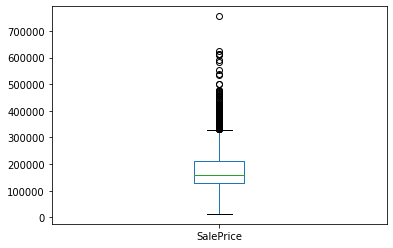

In [26]:
housing.SalePrice.plot(kind='box')
housing.SalePrice.describe()

In [27]:
housing.GarageCars.describe()

count    2578.000000
mean        1.747091
std         0.739459
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

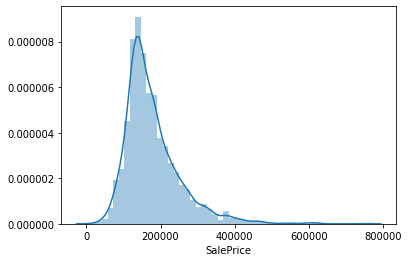

In [28]:
sns.distplot(housing.SalePrice)
# Sale price of houses in Ames are normally distributed with mean price around $178,000 and sd $75,000

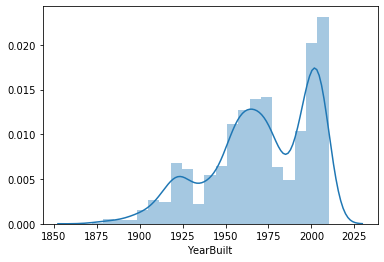

In [29]:
sns.distplot(housing.YearBuilt)
# YearBuilt of houses are not normally distributed. Local maximums around 1923, 1960, 2005.
# (every 40 years, a wave of new houses)

In [30]:
categorical = housing[['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd']]

KeyError: "['MiscFeature'] not in index"

In [ ]:
continous = housing[['SalePrice','LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']]

In [ ]:
areas = housing[['SalePrice','GrLivArea','WoodDeckSF', 'GrPorchArea', 'GarageArea','Pool_YN']]

In [ ]:
SalePrice = housing.SalePrice

In [ ]:
areas.plot(kind='scatter', x='WoodDeckSF', y='SalePrice')

In [ ]:
sns.pairplot(areas)

In [ ]:
housing.corr()['SalePrice'].sort_values(ascending=False)

In [ ]:
null_columns = housing.isnull().sum()
null_columns[null_columns>0]

In [ ]:
areas['GrPorchArea']=areas['OpenPorchSF']+areas['EnclosedPorch']+areas['3SsnPorch'] + areas['ScreenPorch']

In [ ]:
areas.head()

In [ ]:
gr_area = areas[['SalePrice','GrLivArea','WoodDeckSF','GarageArea','GrPorchArea']]

In [ ]:
sns.pairplot(gr_area)

In [ ]:
gr_area.plot(kind='scatter', x='GrPorchArea',y='SalePrice')

In [ ]:
housing.plot(kind='bar', x='HouseStyle')

In [ ]:
# housing.HouseStyle.value_counts()

In [ ]:
# housing.YrSold.value_counts()

In [ ]:
# housing.SaleType.value_counts()

In [ ]:
# housing.Neighborhood.value_counts()

In [ ]:
# housing.BldgType.value_counts()

In [ ]:
lm = LinearRegression()
grLivArea = size_related[['GrLivArea']]
lm.fit(grLivArea, price)
lm.score(grLivArea, price)

In [ ]:
housing.head(10)

* Which of the house styles, ranch or colonial, is more popular in terms of the house prices?

* What is the popularity in terms of the housing inventory (based on the available data)? 1 story vs 2 story??

* Does the house price sensitivity on 2ndFlrSF depend on the house style (1st story excluded)?

* Does home remodeling add value to the houses? For example, how do the old houses which were remodeled in the 1990s compare to the houses which were built in the 1990s?

In [ ]:
housing.groupby('HouseStyle')['PID'].count().plot(kind='bar')

In [ ]:
housing.groupby('HouseStyle')['SalePrice'].mean().plot(kind='bar')

In [ ]:
housing.groupby('HouseStyle')['SalePrice'].median().plot(kind='bar')

In [ ]:
housing.groupby('BldgType')['SalePrice'].mean().plot(kind='bar')

In [ ]:
housing.groupby('BldgType')['SalePrice'].median().plot(kind='bar')

In [ ]:
remodel_price = housing.groupby((housing.YearRemodAdd//10)*10)[['SalePrice']].mean().reset_index()
built_price = housing.groupby((housing.YearBuilt//10)*10)[['SalePrice']].mean().reset_index()
remodel_built = remodel_price.merge(built_price, how = 'left', left_on='YearRemodAdd', right_on='YearBuilt')[['YearRemodAdd','SalePrice_x','SalePrice_y']].rename(columns={'YearRemodAdd':'Year','SalePrice_x':'Mean_Remodeled_Price','SalePrice_y':'Mean_Built_Price'})
remodel_built = pd.melt(remodel_built,id_vars=['Year'])
sns.barplot(data = remodel_built, x='Year', y='value', hue='variable')

In [ ]:
remodel_price = housing.groupby((housing.YearRemodAdd//10)*10)[['SalePrice']].median().reset_index()
built_price = housing.groupby((housing.YearBuilt//10)*10)[['SalePrice']].median().reset_index()
remodel_built = remodel_price.merge(built_price, how = 'left', left_on='YearRemodAdd', right_on='YearBuilt')[['YearRemodAdd','SalePrice_x','SalePrice_y']].rename(columns={'YearRemodAdd':'Year','SalePrice_x':'Median_Remodeled_Price','SalePrice_y':'Median_Built_Price'})
remodel_built = pd.melt(remodel_built,id_vars=['Year'])
sns.barplot(data = remodel_built, x='Year', y='value', hue='variable')

In [ ]:
remodel_price = housing.groupby((housing.YearRemodAdd//10)*10)[['SalePrice']].median().reset_index()
built_price = housing.groupby((housing.YearBuilt//10)*10)[['SalePrice']].median().reset_index()
remodel_built = remodel_price.merge(built_price, how = 'left', left_on='YearRemodAdd', right_on='YearBuilt')[['YearRemodAdd','SalePrice_x','SalePrice_y']].rename(columns={'YearRemodAdd':'Year','SalePrice_x':'Median_Remodeled_Price','SalePrice_y':'Median_Built_Price'})

In [ ]:
remodel_built['New-Remodeled']=remodel_built.Median_Built_Price - remodel_built.Median_Remodeled_Price

In [ ]:
remodel_built

In [ ]:
housing[housing.YearRemodAdd==2010]

In [ ]:
# how much does remodeling increase cost?
# look at average price per built decade without remodeling and compare with average price per built decade with remodeling
not_remodeled_price = housing[housing.YearRemodAdd==housing.YearBuilt].groupby((housing[housing.YearRemodAdd==housing.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodeled_price = housing[housing.YearRemodAdd!=housing.YearBuilt].groupby((housing[housing.YearRemodAdd!=housing.YearBuilt].YearBuilt//10)*10)['SalePrice'].mean().reset_index()
remodel_and_not = remodeled_price.merge(not_remodeled_price, how = 'right', on='YearBuilt').rename(columns={'SalePrice_x':'Price_Remodeled','SalePrice_y':'Price_Not_Remodeled'})
remodel_and_not = pd.melt(remodel_and_not,id_vars=['YearBuilt'])
sns.barplot(data = remodel_and_not, x='YearBuilt', y='value', hue='variable')
# group into the year built

In [ ]:
remodeled_price

In [ ]:
remodel_and_not = remodeled_price.merge(not_remodeled_price, how = 'left', on='YearBuilt').rename(columns={'SalePrice_x':'Price_Remodeled','SalePrice_y':'Price_Not_Remodeled'})

In [ ]:
remodel_and_not['Price_diff']=remodel_and_not.Price_Remodeled-remodel_and_not.Price_Not_Remodeled

In [ ]:
remodel_and_not

### Looking at monthly trends on sale price

In [ ]:
housing.groupby('MoSold').mean()['SalePrice'].plot()

In [ ]:
housing.plot(kind='box',x='MoSold',y='SalePrice')

## Modelling finally!!

## 1. Linear Models

In [ ]:
lm_data = housing[['GrLivArea','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','GrPorchArea','WoodDeckSF']]
target = housing.SalePrice

In [ ]:
lm_data.isna().sum(axis=0)

In [ ]:
from sklearn import model_selection

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(lm_data, target, test_size=.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(x_train,y_train)
print('train score',lm.score(x_train,y_train))
print('test score',lm.score(x_test,y_test))

In [ ]:
lm.coef_
lm.intercept_

In [ ]:
housing.groupby('Fireplaces').mean()

In [35]:
housing[housing.SalePrice>400000]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Shed,Gar2,GrPorchArea,Pool_YN
30,528106110,2046,450000,20,RL,105.0,15431,Pave,3,Reg,Lvl,1,Inside,Gtl,27,1,1,4,5,10,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,400.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1430.0,Unf,0.0,564.0,1994.0,GasA,Ex,Y,SBrkr,2046,0,0,1.0,0.0,2,1,2,1,Ex,7,Typ,2,4,Attchd,Fin,3.0,878.0,TA,TA,Y,188,0,No,0,8,2007,WD,Normal,0,0,240,0
66,528164060,2470,615000,20,RL,106.0,12720,Pave,3,Reg,HLS,1,Inside,Mod,27,1,1,4,5,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,0,0,2.0,0.0,1,1,1,1,Ex,7,Typ,2,4,Attchd,Fin,3.0,789.0,TA,TA,Y,154,4,No,0,2,2008,WD,Normal,0,0,281,1
104,528441090,2490,468000,20,RL,85.0,11128,Pave,3,Reg,Lvl,1,Corner,Gtl,22,2,2,4,5,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,198.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2158.0,Unf,0.0,300.0,2458.0,GasA,Ex,Y,SBrkr,2490,0,0,1.0,0.0,2,0,2,1,Ex,9,Typ,2,4,Attchd,Fin,3.0,795.0,TA,TA,Y,70,0,4,0,10,2009,WD,Normal,0,0,226,0
109,528118050,2290,500067,20,RL,59.0,17169,Pave,3,IR2,Lvl,1,CulDSac,Gtl,27,1,1,4,5,10,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,970.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1684.0,Unf,0.0,636.0,2320.0,GasA,Ex,Y,SBrkr,2290,0,0,2.0,0.0,2,1,2,1,Ex,7,Typ,1,4,Attchd,Fin,3.0,1174.0,TA,TA,Y,192,0,No,0,8,2007,New,Partial,0,0,30,0
125,906412010,2276,475000,20,RL,91.0,11778,Pave,3,Reg,Lvl,1,Inside,Gtl,19,1,1,4,5,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,554.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,2085.0,Unf,0.0,186.0,2271.0,GasA,Ex,Y,SBrkr,2276,0,0,1.0,0.0,2,0,3,1,Ex,7,Typ,2,4,Attchd,RFn,3.0,1348.0,Gd,TA,Y,0,0,No,0,6,2008,WD,Abnorml,0,0,325,0
174,528429120,2097,423000,20,RL,49.0,20896,Pave,3,IR2,Lvl,1,CulDSac,Gtl,22,0,1,4,5,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1721.0,Unf,0.0,356.0,2077.0,GasA,Ex,Y,SBrkr,2097,0,0,1.0,0.0,1,1,1,1,Ex,8,Typ,1,5,Attchd,Fin,3.0,1134.0,TA,TA,Y,192,0,No,0,1,2006,New,Partial,0,0,267,0
215,528176010,2696,500000,20,RL,110.0,14300,Pave,3,Reg,HLS,1,Inside,Mod,27,1,1,4,5,9,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,1095.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1373.0,Unf,0.0,1473.0,2846.0,GasA,Ex,Y,SBrkr,2696,0,0,1.0,0.0,2,1,3,1,Ex,10,Typ,2,4,Attchd,Fin,3.0,958.0,TA,TA,Y,220,0,No,0,6,2010,WD,Normal,0,0,150,0
243,528110110,2464,417500,20,RL,105.0,13693,Pave,3,Reg,Lvl,1,Inside,Gtl,27,1,1,4,5,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,554.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1728.0,BLQ,495.0,195.0,2418.0,GasA,Ex,Y,SBrkr,2464,0,0,1.0,0.0,2,1,4,1,Ex,9,Typ,1,5,Attchd,Fin,3.0,650.0,TA,TA,Y,358,0,No,0,8,2008,WD,Normal,0,0,78,0
291,528110040,2552,479069,20,RL,107.0,13891,Pave,3,Reg,Lvl,1,Inside,Gtl,27,1,1,4,5,9,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Stone,456.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1812.0,Unf,0.0,740.0,2552.0,GasA,Ex,Y,SBrkr,2552,0,0,1.0,0.0,2,0,3,1,Ex,8,Typ,2,5,Attchd,Fin,3.0,932.0,TA,TA,Y,130,0,No,0,10,2007,New,Partial,0,0,28,0
315,528114010,1868,415000,20,RL,120.0,14780,Pave,3,IR1,HLS,1,Corner,Mod,27,1,1,4,5,9,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,568.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1505.0,Unf,0.0,363.0,1868.0,GasA,Ex,Y,SBrkr,1868,0,0,1.0,0.0,2,0,2,1,Ex,7,Typ,1,4,Attchd,Fin,3.0,1085.0,TA,TA,Y,354,0,No,0,6,2006,WD,Normal,0,0,212,0


## 2. Tree Based Models

In [568]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [563]:
# pick our features and target
X = housing[['GrLivArea',
           'MSSubClass',
           'LotFrontage',
           'LotArea',
           'Alley',
           'Neighborhood',
           'Condition1',
           'Condition2',
           'BldgType',
           'HouseStyle',
           'OverallQual',
           'OverallCond',
           'YearBuilt',
           'YearRemodAdd',
           'MasVnrArea',
           'FullBath',
           'HalfBath',
           'BedroomAbvGr',
           'KitchenAbvGr',
           'TotRmsAbvGrd',
           'Fireplaces',
           'GarageCars',
           'MoSold',
           'YrSold']]

Y = housing.SalePrice
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [573]:

gbm = GradientBoostingRegressor()
gbm.set_params(n_estimators:1000, 
            learning_rate:.3,
            max_depth:2,
            min_samples_leaf:3)
gbm.fit(X_train,Y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, Y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,Y_test)))

--------------------------------------------------
The train set R^2 is 0.947
The test set R^2 is 0.853


In [584]:
param_grid={'n_estimators':[1000], 
            'learning_rate': [.3,.2,0.1],
            'max_depth':[1,2,3],
            'min_samples_leaf':[3]
           }

grid_search = GridSearchCV(estimator= gbm, param_grid= param_grid)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [585]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 1000}
0.9094137389247144


In [586]:
gbm.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [574]:
sorted(zip(X.columns, gbm.feature_importances_), key=lambda t:t[1], reverse=True)

[('OverallQual', 0.5075782262591287),
 ('GrLivArea', 0.16792930431827832),
 ('Neighborhood', 0.12327077777484496),
 ('GarageCars', 0.05972881128693573),
 ('LotArea', 0.03557973492676298),
 ('Fireplaces', 0.025475146017283082),
 ('YearBuilt', 0.022132114164561158),
 ('MasVnrArea', 0.013574237830266562),
 ('YearRemodAdd', 0.011103962301425721),
 ('OverallCond', 0.01083410451092977),
 ('MSSubClass', 0.007945136257588825),
 ('LotFrontage', 0.002369127548976175),
 ('BedroomAbvGr', 0.002323256347578987),
 ('Condition1', 0.0022095034411124576),
 ('HalfBath', 0.001438880194312648),
 ('MoSold', 0.0013774414169038939),
 ('HouseStyle', 0.001370105255299453),
 ('TotRmsAbvGrd', 0.0009993483068055928),
 ('BldgType', 0.0008971477222364359),
 ('FullBath', 0.0006623524025388582),
 ('Condition2', 0.000631530850589073),
 ('KitchenAbvGr', 0.00035926693504539974),
 ('YrSold', 0.0002104839305953234),
 ('Alley', 0.0)]